In [230]:
# importing all the libraries i need to complete the tasks in this challenge.
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sklearn.feature_selection as chi2
import warnings
warnings.filterwarnings('ignore')

# Exercise 1: Data Loading and Price Charting

##### loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named asset_price_data.csv, containing essential pricing information for various financial assets.

In [123]:
# importing the csv file and converting date column from 'object' type to 'datetime'.
df = pd.read_csv('/Users/biruk/Documents/Ironhack/Portfolio Analysis/asset_price_data.csv', parse_dates=['date'], index_col='date')
asset_price = df.copy()

In [125]:
asset_price.head(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41


In [139]:
asset_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Asset1  770 non-null    float64
 1   Asset2  770 non-null    float64
 2   Asset3  770 non-null    float64
 3   Asset4  734 non-null    float64
 4   Asset5  763 non-null    float64
dtypes: float64(5)
memory usage: 52.9 KB


In [164]:
# Assets prices average from 1 - 5 from the biging of 2019 to the end of 2021.
asset_price['2019-01-01':'2021-12-30'].mean()

Asset1    248.980482
Asset2     76.075978
Asset3     31.463502
Asset4    327.336098
Asset5     54.123198
dtype: float64

##### Post data loading, your objective is to visualize this data through a time series graph. The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<Axes: xlabel='date'>

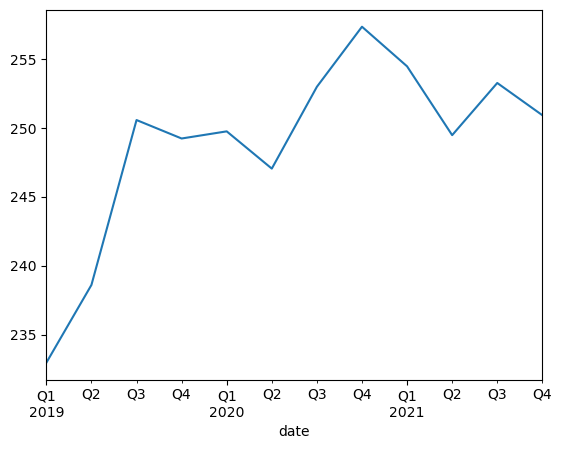

In [166]:
# Assets prices average in a quarterly base from 1 - 5 from the biging of 2019 to the end of 2021.
%matplotlib inline
asset_price.Asset1.resample('Q').mean().plot()

# Exercise 2: Daily Percentage Returns

##### You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:

###### Calculate the correlation matrix for the five assets.
###### Create a scatter plot comparing the returns of two specific assets.

In [190]:
my_matrix = asset_price.corr().round(2)
my_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.00,0.50,0.37,0.57,0.07
Asset2,0.50,1.00,0.91,0.88,0.83
Asset3,0.37,0.91,1.00,0.88,0.87
Asset4,0.57,0.88,0.88,1.00,0.78
Asset5,0.07,0.83,0.87,0.78,1.00


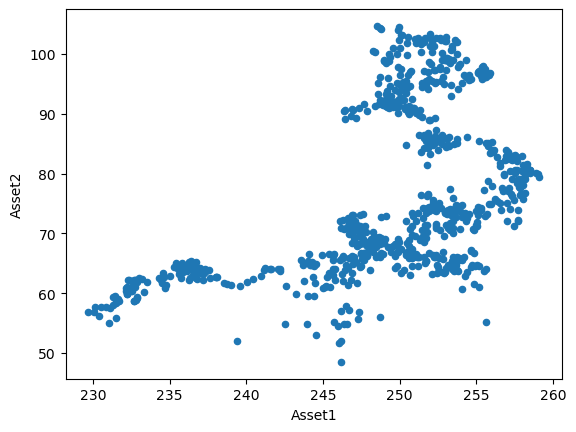

In [206]:
# Comparing Asset1 and Asset2 in a scatter plot.
asset_price.plot(kind='scatter', x='Asset1',y='Asset2')
plt.show()

# Exercise 3: Portfolio Analysis

##### This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named portfolio_weights.csv, which contains the daily weights of each asset in the portfolio.

In [316]:
# importing the csv file and converting date column from 'object' type to 'datetime'.
df = pd.read_csv('/Users/biruk/Documents/Ironhack/Portfolio Analysis/portfolio_weights.csv', parse_dates=['date'])
portfolio_weights = df.copy()

In [318]:
portfolio_weights.head(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


##### Create an area chart of the asset weights.

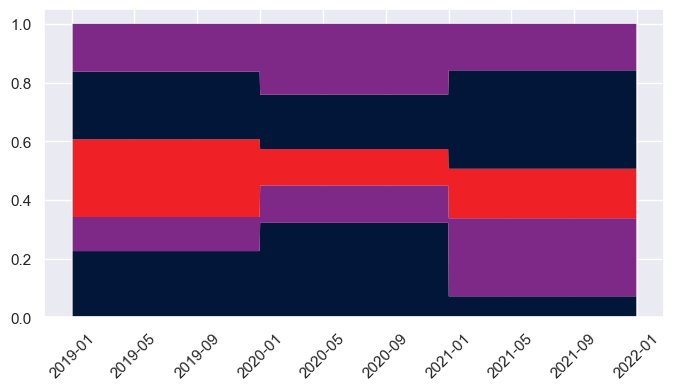

In [333]:
colors = ['#011638', '#7e2987', '#ef2026']
labels = ['Assets weights']
plt.figure(figsize = (8, 4))
plt.stackplot(portfolio_weights['date'],
              portfolio_weights['Asset1'],
              portfolio_weights['Asset2'],
              portfolio_weights['Asset3'],
              portfolio_weights['Asset4'],
              portfolio_weights['Asset5'],
             colors = colors,
             edgecolor = 'none')
plt.xticks(rotation = 45)

plt.show()

##### Plot the historical cumulative returns of the portfolio.

##### Calculate the annualized return of the portfolio.

##### Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).

##### Produce an area chart grouping asset weights by their categories, as detailed in the asset_information_data.csv.

In [339]:
df = pd.read_csv('/Users/biruk/Documents/Ironhack/Portfolio Analysis/asset_information_data.csv')
asset_information = df.copy()

In [345]:
asset_information.head()

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


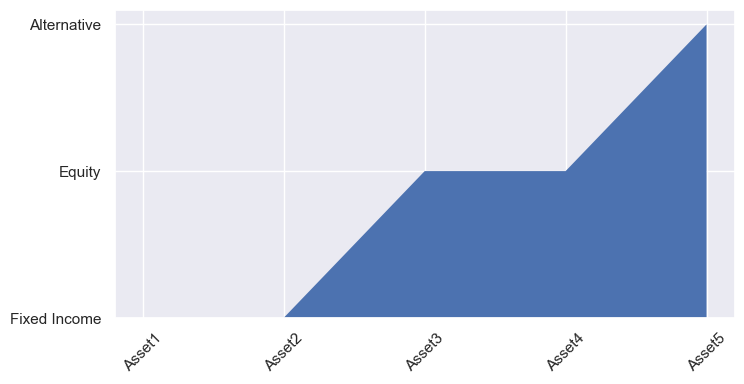

In [349]:
plt.figure(figsize = (8, 4))
plt.stackplot(asset_information['Name'],
              asset_information['Family'],
              edgecolor = 'none')
plt.xticks(rotation = 45)

plt.show()